In [1]:
!nrnivmodl /home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod
from neuron import h
import plotly.graph_objects as go
import matplotlib.colors as mcolors
from neuron.units import ms, mV
import plotly.io as pio
from matplotlib import pyplot, cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
from neuron import clear_gui_callback
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from numpy.linalg import pinv, eig
import numpy as np
from multiprocessing import Pool
font2={'family':'Times New Roman',
'weight':'bold',
'size': 10}
# 自定义刻度标签显示格式

from matplotlib.ticker import FuncFormatter
def format_func(value, tick_number):
    return f'{value:.0f}'  # 将刻度值格式化为小数点后两位

def plot_curve(ax2,x,y,color='black',title='', linestyle='-',xlim=[0,100],dx=20,
               ylim=[0,10],dy=5.0, fontsize=10, alpha = 1.0, xlabel='Time/ms', 
               ylabel = 'Frequency/Hz', label='',ynum_decimals =1, 
               nonscatter=True, s0=10):
    if nonscatter:
        if color:
            ax2.plot(x,y,color=color,linewidth=2,linestyle=linestyle,alpha=alpha, label=label)
        else:
            ax2.plot(x,y,linewidth=2,alpha=alpha, linestyle=linestyle,label=label)
    else:
        if color:
            ax2.scatter(x,y,color=color,linewidth=2,linestyle=linestyle,alpha=alpha, 
                        label=label, s=s0)
        else:
            ax2.scatter(x,y,linewidth=2,alpha=alpha, linestyle=linestyle,label=label,
                        s=s0)
        
    ax2.set_xlabel(xlabel,font2)
    ax2.set_ylabel(ylabel,font2)
    
    # def format_funcx(value, tick_number, num_decimals=xnum_decimals):
    #     if num_decimals==0:
    #         return f'{value:.0f}'
    #     return f'{value:.{num_decimals}f}'

    def format_funcy(value, tick_number, num_decimals=ynum_decimals):
        if num_decimals==0:
          return f'{value:.0f}'
        return f'{value:.{num_decimals}f}'

    # if dx:
    #     ax2.set_xticks(np.arange(xlim[0], xlim[1] + dx, dx))
    #     ax2.set_xticklabels(ax2.get_xticks(), fontsize=fontsize, weight='bold')
    #     ax2.set_xlim([xlim[0], xlim[1]])
    #     ax2.xaxis.set_major_formatter(FuncFormatter(format_funcx))

    if dy:
        ax2.set_yticks(np.arange(ylim[0], ylim[1] + dy, dy))
        ax2.set_yticklabels(ax2.get_yticks(), fontsize=fontsize, weight='bold')
        ax2.set_ylim([ylim[0], ylim[1]])
        ax2.yaxis.set_major_formatter(FuncFormatter(format_funcy))
        
  
    if xlim:
       ax2.set_xticks(np.arange(xlim[0],xlim[1]+dx,dx))
       ax2.set_xticklabels(np.arange(xlim[0],xlim[1]+dx,dx),fontsize=10,weight='bold')
       ax2.set_xlim(xlim)
    # if ylim:
    #    ax2.set_yticks(np.arange(ylim[0],ylim[1]+dy,dy))
    #    ax2.set_yticklabels(np.arange(ylim[0],ylim[1]+dy,dy),fontsize=10,weight='bold')
    #    ax2.set_ylim(ylim)
    if title:
       ax2.set_title('{0}'.format(title),fontsize=12,weight='bold')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    if label:
       ax2.legend(loc='best',prop=font2,edgecolor='white')

h.load_file('nrngui.hoc')
h.load_file("import3d.hoc")

morphologyFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/morphologies/cell1.asc"
biophysicalModelFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/models/L5PCbiophys1.hoc"
biophysicalModelTemplateFilename = "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/models/L5PCtemplate.hoc"

h.load_file(biophysicalModelFilename)
h.load_file(biophysicalModelTemplateFilename)

    

/home/wzl/anaconda/envs/neuron9/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
INFO : Using neuron-nightly Package (Developer Version)
/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron
cfiles =
Mod files: "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/CaDynamics_E2.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ca_HVA.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ca_LVAst.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/epsp.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Ih.mod" "/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/L5PC/mod/Im.mod" "/home/wzl/LFPy/project/conductance_measurement/real

--No graphics will be displayed.


1.0

In [2]:
def shapeplot(var_dend,var_apic,
    figname = 'neurondendriticEPSP_fE1e-3', cmap = cm.jet,
    savefig = False, colorbarlabel='EPSP/mV', ticklabels=False,
    tickmin=0, tickmax=50, dt=10, setv=False, vmin=0., vmax=1.):
    
    L5PC = h.L5PCtemplate(morphologyFilename)
    L5PC.soma[0].diam = 5.
    for sec in h.allsec():
        for seg in sec:
            seg.v =0.
    for i in range(109):
        L5PC.apic[i].v = var_apic[i]
    
    for i in range(84):
        L5PC.dend[i].v = var_dend[i]
    
    L5PC.soma[0].v=0.
    L5PC.axon[0].v=0.
    L5PC.axon[1].v=0.
 
    v_vals = [seg.v for sec in h.allsec() for seg in sec]
    print(min(v_vals),max(v_vals))
    if setv:
        minv= vmin
        maxv = vmax
    else:
        minv= min(v_vals)
        maxv= max(v_vals)

            
    ps = h.PlotShape(False)  # False tells h.PlotShape not to use NEURON's gui
    ps.show(0)
    ps.variable('v')
    ps.scale(minv, maxv)
    ax = ps.plot(pyplot, cmap=cmap)

    # # 设置坐标轴范围
    ax.set_xlim([-300, 300])  # 设置x轴范围
    ax.set_ylim([0, 1400])  # 设置y轴范围
    ax.set_zlim([-600, 0])  # 设置z轴范围

    # ps.view(-400,0, 0, 300, 0, 300, 100, 500)
    ax.view_init(elev=280, azim=98)
    # 关闭网格
    ax.grid(False)
    # 关闭坐标轴
    ax.axis('off')
    
    # 保存为 EPS 格式
    if savefig:
        plt.savefig(figname+'.eps', format='eps')
    
    pyplot.show()
    
    
    
    # second figure
    ps = h.PlotShape(True)
    ps.show(0)
    ps.variable("v")
    ps.scale(minv, maxv)
    fig = ps.plot(plotly, cmap=cmap)
    ps.show(0)


    # Create a colormap function
    colormap = cm.ScalarMappable(cmap=cmap, 
    norm=mcolors.Normalize(vmin=0, vmax=1)).to_rgba

    # Map the normalized values to a Plotly colorscale as strings
    plotly_colorscale = [[v, f'rgb{tuple(int(255 * c) for c in colormap(v)[:3])}'] for v in np.linspace(0, 1, cmap.N)]

    # Create a separate scatter plot for the colorbar
    colorbar_trace = go.Scatter(
        x=[0],
        y=[0],
        mode='markers',
        marker=dict(
            colorscale=plotly_colorscale,
            cmin=minv,
            cmax=maxv,
            colorbar=dict(
                title=colorbarlabel,
                thickness=20  # Adjust the thickness of the colorbar
            ),
            showscale=True
        )
    )

    # Add the colorbar trace to the figure
    fig.add_trace(colorbar_trace)
    fig.update_xaxes(showticklabels=False, showgrid=True)
    fig.update_yaxes(showticklabels=False, showgrid=True)
    fig.update_layout(
        plot_bgcolor='rgba(0,0,0,0)'
    )

    # 创建自定义的颜色映射
    cmap = cmap
    colormap = cm.ScalarMappable(cmap=cmap, 
            norm=mcolors.Normalize(vmin=minv, vmax=maxv))

    # 创建一个新的图形和轴
    fig, ax = plt.subplots(figsize=(6, 1))

    # 绘制颜色条
    cbar = plt.colorbar(colormap, cax=ax, orientation='horizontal')
    cbar.set_label(colorbarlabel)
    if ticklabels:
        cbar.set_ticks(np.arange(tickmin, tickmax+dt, dt))
        cbar.set_ticklabels([f'{i}' for i in np.arange(tickmin, tickmax+dt, dt)])

    # 设置图的边界
    plt.tight_layout()

    if savefig:
        # 保存为 EPS 格式
        plt.savefig(figname+'colorbar'+'.eps', format='eps')

    # 显示图形（可选）
    plt.show()
    
    print(minv,maxv)

    

In [7]:
estimated_lambdas[34,:]

array([5.55380557e-05, 2.76319646e-05])

0.2189155637037413 11.626798189648223
-199.13867864687103 1021.4060955046851
0.0 10.626798189648223


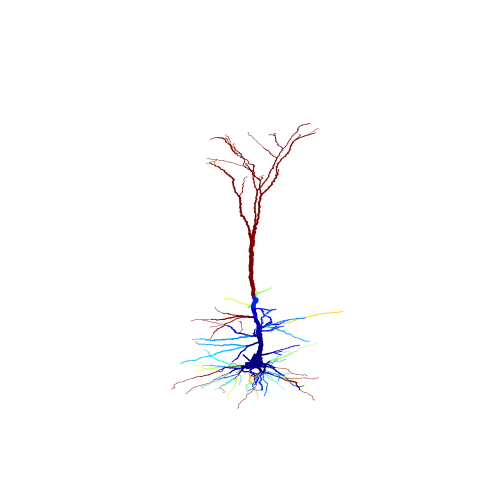

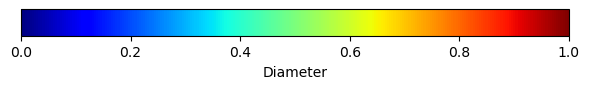

0.0 1
0.0 203.28121910093702


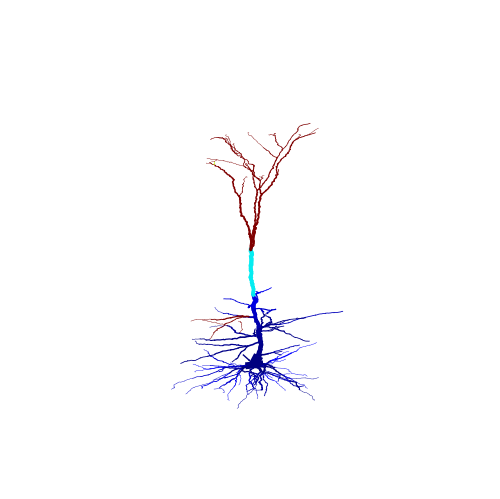

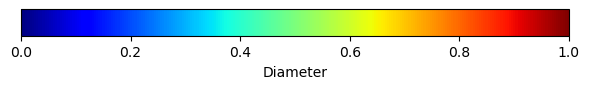

0.0 1


In [8]:
estimated_lambdas = np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/estimated_lambdas_active_alldend_fE5e4_twice_clamp_gIhbar_Ih0_05_relative_reversal_potential.txt")
estimated_lambdas_apic  = estimated_lambdas[:109,:]
estimated_lambdas_dend = estimated_lambdas[109:,:]
estimated_lambdas_apic_rise = -1./estimated_lambdas_apic[:,0]
estimated_lambdas_apic_decay = -1./estimated_lambdas_apic[:,1]
estimated_lambdas_dend_rise = -1./estimated_lambdas_dend[:,0]
estimated_lambdas_dend_decay = -1./estimated_lambdas_dend[:,1]

truth_rise = 1.0
var_dend_rise = np.abs(estimated_lambdas_dend_rise - truth_rise)/truth_rise
var_apic_rise = np.abs(estimated_lambdas_apic_rise - truth_rise)/truth_rise
truth_decay = 5.0
var_dend_decay = np.abs(estimated_lambdas_dend_decay - truth_decay)/truth_decay
var_apic_decay = np.abs(estimated_lambdas_apic_decay - truth_decay)/truth_decay
print(np.min(-1./estimated_lambdas[:,0]),np.max(-1./estimated_lambdas[:,0]))
print(np.min(-1./estimated_lambdas[:,1]),np.max(-1./estimated_lambdas[:,1]))
shapeplot(var_dend_rise, var_apic_rise, 
        figname = 'estimated_lambda_rise_active_fE5e4_relative_reversal_potential', 
        savefig = True, colorbarlabel='Diameter',ticklabels=False,
        tickmin=0., tickmax=1, dt=0.5, cmap=cm.jet, setv=True, vmin=0., vmax=1)

shapeplot(var_dend_decay, var_apic_decay, 
        figname = 'estimated_lambda_decay_active_fE5e4_relative_reversal_potential', 
        savefig = True, colorbarlabel='Diameter',ticklabels=False,
        tickmin=0., tickmax=1, dt=0.5, cmap=cm.jet, setv=True, vmin=0., vmax=1)


In [ ]:
# _gIhbar_Ih0_05
estimated_lambdas_apic= np.loadtxt("estimated_lambdas_active_apicloc109_fE1e4.txt")
estimated_lambdas_apic_rise = -1./estimated_lambdas_apic[:,0]
estimated_lambdas_apic_decay = -1./estimated_lambdas_apic[:,1]

estimated_lambdas_dend= np.loadtxt("estimated_lambdas_active_dendloc84_fE1e4.txt")
estimated_lambdas_dend_rise = -1./estimated_lambdas_dend[:,0]
estimated_lambdas_dend_decay = -1./estimated_lambdas_dend[:,1]


truth = 1.0
var_dend = np.abs(estimated_lambdas_dend_rise - truth)/truth
var_apic = np.abs(estimated_lambdas_apic_rise - truth)/truth
# truth = 5.0
# var_dend = np.abs(estimated_lambdas_dend_decay - truth)/truth
# var_apic = np.abs(estimated_lambdas_apic_decay - truth)/truth
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
print(np.argmax(var_dend),np.argmax(var_apic))

# shapeplot(var_dend, var_apic, 
#         figname = 'passive_rise_fE1e4', 
#         savefig = True, colorbarlabel='relative error',ticklabels=False,
#         tickmin=0., tickmax=1., dt=0.5, cmap=cm.jet, setv=True, vmin=0., vmax=1.)

0.5409026193052127 4.013564128543727
5.035600670871973 24.017431569973123
0.0 3.0135641285437273


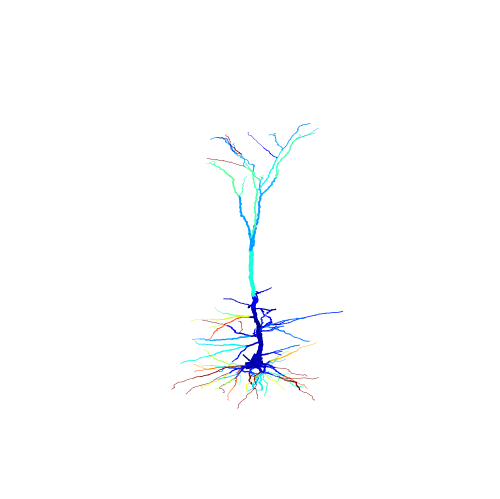

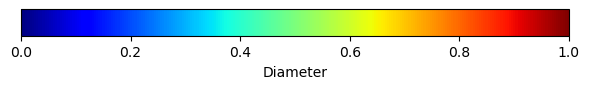

0.0 1
0.0 3.8034863139946244


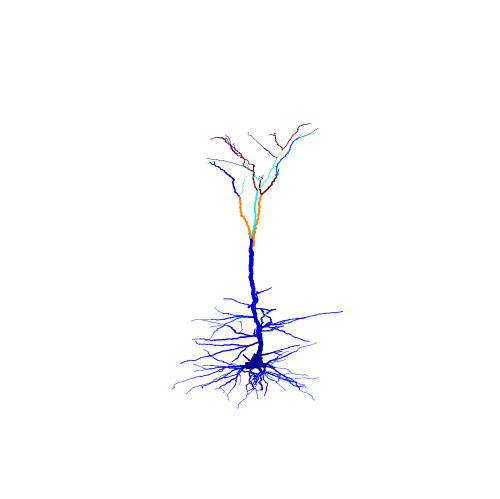

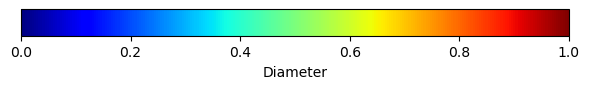

0.0 1


In [4]:
estimated_lambdas = np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/estimated_lambdas_active_alldend_fE5e4_once_clamp_blockIh_add_constraint.txt")
estimated_lambdas_apic  = estimated_lambdas[:109,:]
estimated_lambdas_dend = estimated_lambdas[109:,:]
estimated_lambdas_apic_rise = -1./estimated_lambdas_apic[:,0]
estimated_lambdas_apic_decay = -1./estimated_lambdas_apic[:,1]
estimated_lambdas_dend_rise = -1./estimated_lambdas_dend[:,0]
estimated_lambdas_dend_decay = -1./estimated_lambdas_dend[:,1]

truth_rise = 1.0
var_dend_rise = np.abs(estimated_lambdas_dend_rise - truth_rise)/truth_rise
var_apic_rise = np.abs(estimated_lambdas_apic_rise - truth_rise)/truth_rise
truth_decay = 5.0
var_dend_decay = np.abs(estimated_lambdas_dend_decay - truth_decay)/truth_decay
var_apic_decay = np.abs(estimated_lambdas_apic_decay - truth_decay)/truth_decay
print(np.min(-1./estimated_lambdas[:,0]),np.max(-1./estimated_lambdas[:,0]))
print(np.min(-1./estimated_lambdas[:,1]),np.max(-1./estimated_lambdas[:,1]))
shapeplot(var_dend_rise, var_apic_rise, 
        figname = 'diameter', 
        savefig = True, colorbarlabel='Diameter',ticklabels=False,
        tickmin=0., tickmax=1, dt=0.5, cmap=cm.jet, setv=True, vmin=0., vmax=1)

shapeplot(var_dend_decay, var_apic_decay, 
        figname = 'diameter', 
        savefig = True, colorbarlabel='Diameter',ticklabels=False,
        tickmin=0., tickmax=1, dt=0.5, cmap=cm.jet, setv=True, vmin=0., vmax=1)


In [6]:
-1./estimated_lambdas_apic[64,:]

array([ 0.71267192, 24.01743157])

# diameter

0.2899999916553496 1.8437665520550515
0.2599999904632567 4.08698291062178
0.0 4.08698291062178


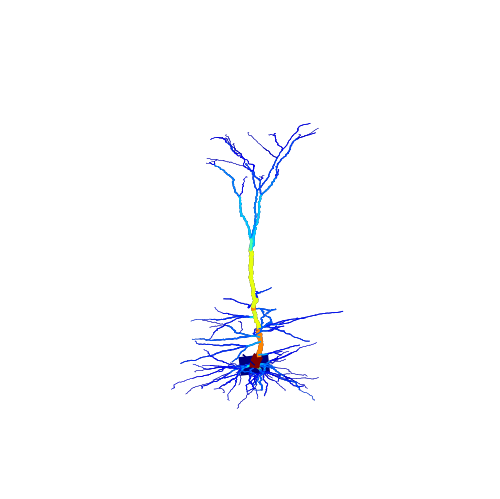

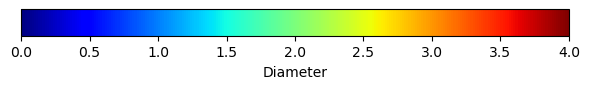

0.0 4


In [4]:

L5PC = h.L5PCtemplate(morphologyFilename)
diameters_dend=np.zeros(84)
diameters_apic = np.zeros(109)
for i in range(len(L5PC.dend)):
    diameters_dend[i] = L5PC.dend[i].diam
for i in range(len(L5PC.apic)):
    diameters_apic[i] = L5PC.apic[i].diam
    
var_dend = diameters_dend
var_apic = diameters_apic
print(np.min(var_dend),np.max(var_dend))
print(np.min(var_apic),np.max(var_apic))
shapeplot(var_dend, var_apic, 
        figname = 'diameter', 
        savefig = True, colorbarlabel='Diameter',ticklabels=False,
        tickmin=0., tickmax=4, dt=2., cmap=cm.jet, setv=True, vmin=0., vmax=4)

# the effect of HCN channels

0.012213597888836929 10.453994400021209
1.0882996373390565 122.13311541327774
0.0 9.453994400021209


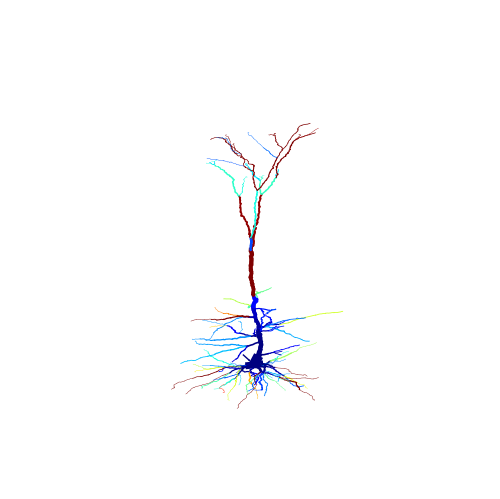

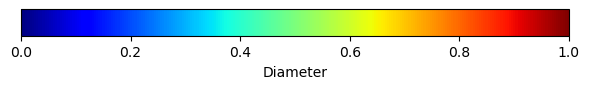

0.0 1
0.0 23.426623082655546


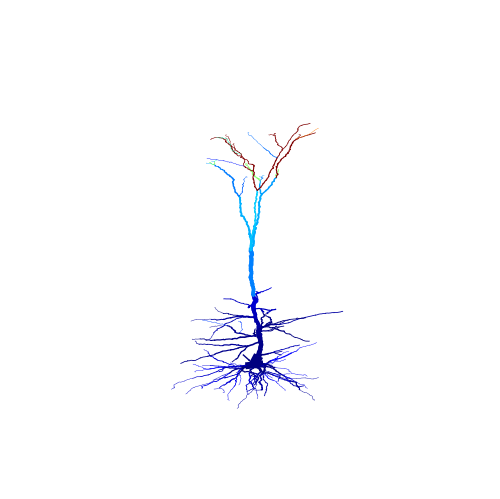

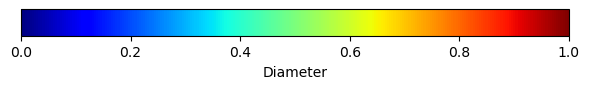

0.0 1


In [17]:
estimated_lambdas = np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/estimated_lambdas_active_alldend_fE5e4_two_clamp_add_constraint.txt")
estimated_lambdas_apic  = estimated_lambdas[:109,:]
estimated_lambdas_dend = estimated_lambdas[109:,:]
estimated_lambdas_apic_rise = -1./estimated_lambdas_apic[:,0]
estimated_lambdas_apic_decay = -1./estimated_lambdas_apic[:,1]
estimated_lambdas_dend_rise = -1./estimated_lambdas_dend[:,0]
estimated_lambdas_dend_decay = -1./estimated_lambdas_dend[:,1]

truth_rise = 1.0
var_dend_rise_active = np.abs(estimated_lambdas_dend_rise - truth_rise)/truth_rise
var_apic_rise_active = np.abs(estimated_lambdas_apic_rise - truth_rise)/truth_rise
truth_decay = 5.0
var_dend_decay_active = np.abs(estimated_lambdas_dend_decay - truth_decay)/truth_decay
var_apic_decay_active = np.abs(estimated_lambdas_apic_decay - truth_decay)/truth_decay
print(np.min(-1./estimated_lambdas[:,0]),np.max(-1./estimated_lambdas[:,0]))
print(np.min(-1./estimated_lambdas[:,1]),np.max(-1./estimated_lambdas[:,1]))
shapeplot(var_dend_rise_active, var_apic_rise_active, 
        figname = 'diameter', 
        savefig = False, colorbarlabel='Diameter',ticklabels=False,
        tickmin=0., tickmax=1, dt=0.5, cmap=cm.jet, setv=True, vmin=0., vmax=1)

shapeplot(var_dend_decay_active, var_apic_decay_active, 
        figname = 'diameter', 
        savefig = False, colorbarlabel='Diameter',ticklabels=False,
        tickmin=0., tickmax=1, dt=0.5, cmap=cm.jet, setv=True, vmin=0., vmax=1)


0.5683163430418912 6.404781588661797
3.4117550416376683 25.818087516938313
0.0 5.404781588661797


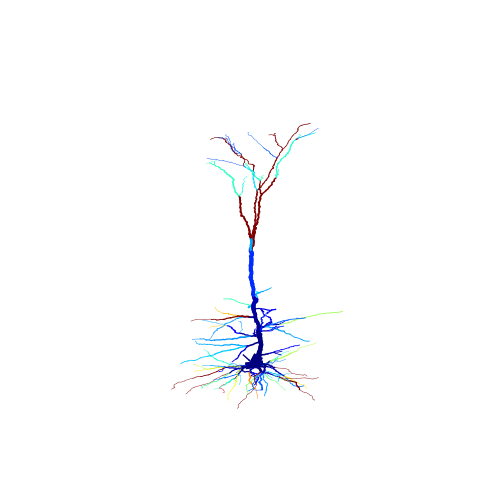

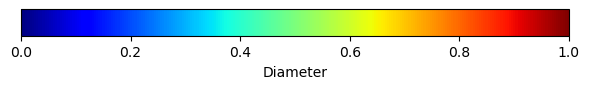

0.0 1
0.0 4.163617503387663


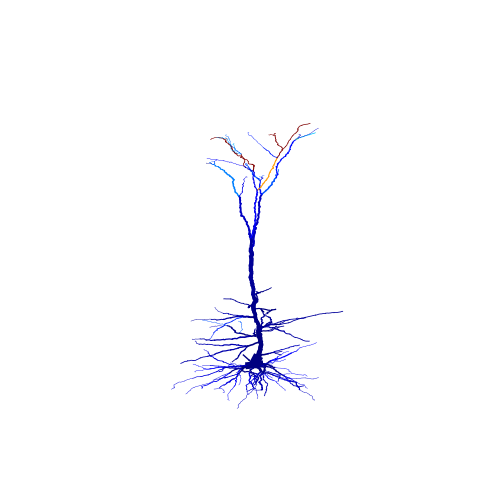

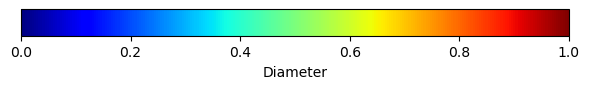

0.0 1


In [16]:
estimated_lambdas = np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/estimated_lambdas_active_alldend_fE5e4_two_clamp_blockIh_add_constraint.txt")
estimated_lambdas_apic  = estimated_lambdas[:109,:]
estimated_lambdas_dend = estimated_lambdas[109:,:]
estimated_lambdas_apic_rise = -1./estimated_lambdas_apic[:,0]
estimated_lambdas_apic_decay = -1./estimated_lambdas_apic[:,1]
estimated_lambdas_dend_rise = -1./estimated_lambdas_dend[:,0]
estimated_lambdas_dend_decay = -1./estimated_lambdas_dend[:,1]

truth_rise = 1.0
var_dend_rise_active_blockIh = np.abs(estimated_lambdas_dend_rise - truth_rise)/truth_rise
var_apic_rise_active_blockIh = np.abs(estimated_lambdas_apic_rise - truth_rise)/truth_rise
truth_decay = 5.0
var_dend_decay_active_blockIh = np.abs(estimated_lambdas_dend_decay - truth_decay)/truth_decay
var_apic_decay_active_blockIh = np.abs(estimated_lambdas_apic_decay - truth_decay)/truth_decay
print(np.min(-1./estimated_lambdas[:,0]),np.max(-1./estimated_lambdas[:,0]))
print(np.min(-1./estimated_lambdas[:,1]),np.max(-1./estimated_lambdas[:,1]))
shapeplot(var_dend_rise_active_blockIh, var_apic_rise_active_blockIh, 
        figname = 'diameter', 
        savefig = False, colorbarlabel='Diameter',ticklabels=False,
        tickmin=0., tickmax=1, dt=0.5, cmap=cm.jet, setv=True, vmin=0., vmax=1)

shapeplot(var_dend_decay_active_blockIh, var_apic_decay_active_blockIh, 
        figname = 'diameter', 
        savefig = False, colorbarlabel='Diameter',ticklabels=False,
        tickmin=0., tickmax=1, dt=0.5, cmap=cm.jet, setv=True, vmin=0., vmax=1)


-2.443191823417425 9.251019370311857


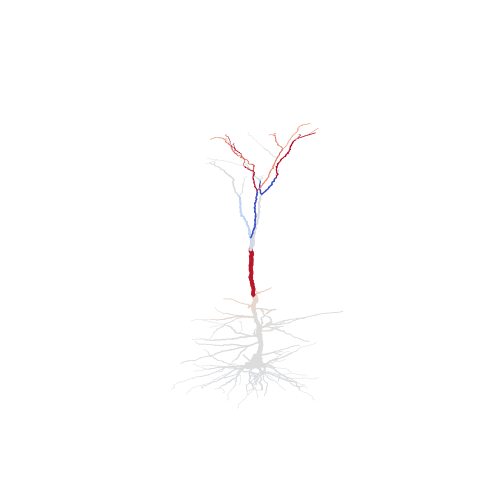

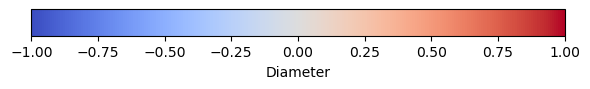

-1.0 1.0
-0.04317731039311434 0.0016180034243240549
-0.120933152057761 21.773202026581107


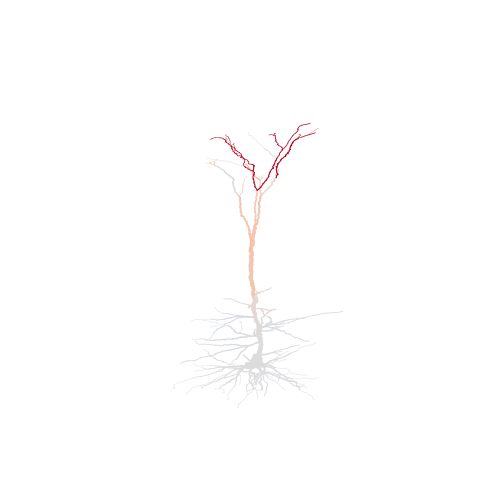

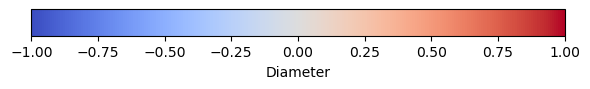

-1.0 1.0
-0.03753883137798386 0.0005828529163942164


In [17]:
shapeplot(var_dend_rise_active-var_dend_rise_active_blockIh, var_apic_rise_active-var_apic_rise_active_blockIh, 
        figname = 'error_diff_active_blockIh_rise', 
        savefig = True, colorbarlabel='Diameter',ticklabels=False,
        tickmin=-1.0, tickmax=1.0, dt=0.5, cmap=cm.coolwarm, setv=True, vmin=-1.0, vmax=1.0)
print(np.min(var_dend_rise_active-var_dend_rise_active_blockIh),np.max(var_dend_rise_active-var_dend_rise_active_blockIh))

shapeplot(var_dend_decay_active-var_dend_decay_active_blockIh, var_apic_decay_active-var_apic_decay_active_blockIh, 
        figname = 'error_diff_active_blockIh_decay', 
        savefig = True, colorbarlabel='Diameter',ticklabels=False,
        tickmin=-1.0, tickmax=1.0, dt=0.5, cmap=cm.coolwarm, setv=True, vmin=-1.0, vmax=1.0)
print(np.min(var_dend_decay_active-var_dend_decay_active_blockIh),np.max(var_dend_decay_active-var_dend_decay_active_blockIh))

(193,)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


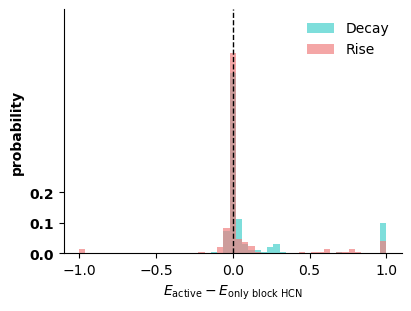

In [21]:
error_diff_rise_dend = var_dend_rise_active-var_dend_rise_active_blockIh
error_diff_rise_apic = var_apic_rise_active-var_apic_rise_active_blockIh
error_diff_decay_dend = var_dend_decay_active-var_dend_decay_active_blockIh
error_diff_decay_apic = var_apic_decay_active-var_apic_decay_active_blockIh
error_diff_rise = np.concatenate((error_diff_rise_dend, error_diff_rise_apic))
error_diff_decay = np.concatenate((error_diff_decay_dend, error_diff_decay_apic))


print(np.shape(error_diff_rise))
fontsize = 10
bins = np.linspace(-1,1,50)
fig, ax1 = plt.subplots(1,1,figsize=(4,3), constrained_layout=True)

# 定义误差和 bin 范围
min_bin = bins[0]  # bins的最小值
max_bin = bins[-1]  # bins的最大值

# 将 error 限制在 [min_bin, max_bin] 之间
clipped_error_rise = np.clip(error_diff_rise, min_bin, max_bin)
clipped_error_decay = np.clip(error_diff_decay, min_bin, max_bin)

nE_our,binsE_our = np.histogram(clipped_error_rise,bins=bins)
nE_trad,binsE_trad = np.histogram(clipped_error_decay,bins=bins)
widths = bins[2]-bins[1]
ax1.bar(bins[:-1], nE_trad/np.sum(nE_trad), zorder=1, align='edge', width=widths, 
        color='mediumturquoise',alpha=0.7, edgecolor = None,  linewidth=1,label='Decay')
ax1.bar(bins[:-1], nE_our/np.sum(nE_our), zorder=1, align='edge', width=widths,
        color='lightcoral',alpha=0.7, edgecolor = None,  linewidth=1,label='Rise')


ax1.set_xlabel(r'$E_{\text{active}}-E_{\text{only block HCN}}$',fontsize=fontsize,weight='bold')
ax1.set_ylabel('probability',fontsize=fontsize,weight='bold')
# ax1.set_xticks(np.arange(0,1.1,0.5))
ax1.set_yticks(np.arange(0,0.3,0.1))
# ax1.set_xticklabels(np.arange(0,1.1,0.5),fontsize=fontsize,weight='bold')
ax1.set_yticklabels(np.arange(0,0.3,0.1),fontsize=fontsize,weight='bold')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylim([0,0.8])
# ax1.set_xlim([0,1])
ax1.legend(loc='best',fontsize=fontsize,edgecolor='white')
ax1.axvline(0, color='black', linestyle='--', linewidth=1)
# ax1.set_title('E',fontsize=fontsize,weight='bold')
plt.savefig('error_diff_HCN.eps')

In [23]:
estimated_lambdas = np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/estimated_lambdas_active_alldend_fE5e4_two_clamp_blockIh_add_constraint.txt")
estimated_lambdas_apic  = estimated_lambdas[:109,:]
estimated_lambdas_dend = estimated_lambdas[109:,:]
estimated_lambdas_apic_rise = -1./estimated_lambdas_apic[:,0]
estimated_lambdas_apic_decay = -1./estimated_lambdas_apic[:,1]
estimated_lambdas_dend_rise = -1./estimated_lambdas_dend[:,0]
estimated_lambdas_dend_decay = -1./estimated_lambdas_dend[:,1]

truth_rise = 1.0
var_dend_rise_active_blockIh = np.abs(estimated_lambdas_dend_rise - truth_rise)/truth_rise
var_apic_rise_active_blockIh = np.abs(estimated_lambdas_apic_rise - truth_rise)/truth_rise
truth_decay = 5.0
var_dend_decay_active_blockIh = np.abs(estimated_lambdas_dend_decay - truth_decay)/truth_decay
var_apic_decay_active_blockIh = np.abs(estimated_lambdas_apic_decay - truth_decay)/truth_decay


estimated_lambdas_passive = np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/estimated_lambdas_passive_alldend_fE5e4_two_clamp_add_constraint.txt")
estimated_lambdas_apic_passive  = estimated_lambdas_passive[:109,:]
estimated_lambdas_dend_passive = estimated_lambdas_passive[109:,:]
estimated_lambdas_apic_rise_passive = -1./estimated_lambdas_apic_passive[:,0]
estimated_lambdas_apic_decay_passive = -1./estimated_lambdas_apic_passive[:,1]
estimated_lambdas_dend_rise_passive = -1./estimated_lambdas_dend_passive[:,0]
estimated_lambdas_dend_decay_passive = -1./estimated_lambdas_dend_passive[:,1]

truth_rise = 1.0
var_dend_rise_passive = np.abs(estimated_lambdas_dend_rise_passive - truth_rise)/truth_rise
var_apic_rise_passive = np.abs(estimated_lambdas_apic_rise_passive - truth_rise)/truth_rise
truth_decay = 5.0
var_dend_decay_passive = np.abs(estimated_lambdas_dend_decay_passive - truth_decay)/truth_decay
var_apic_decay_passive = np.abs(estimated_lambdas_apic_decay_passive - truth_decay)/truth_decay


estimated_lambdas_active = np.loadtxt("/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/estimated_lambdas_active_alldend_fE5e4_two_clamp_add_constraint.txt")
estimated_lambdas_apic_active  = estimated_lambdas_active[:109,:]
estimated_lambdas_dend_active = estimated_lambdas_active[109:,:]
estimated_lambdas_apic_rise_active = -1./estimated_lambdas_apic_active[:,0]
estimated_lambdas_apic_decay_active = -1./estimated_lambdas_apic_active[:,1]
estimated_lambdas_dend_rise_active = -1./estimated_lambdas_dend_active[:,0]
estimated_lambdas_dend_decay_active = -1./estimated_lambdas_dend_active[:,1]

truth_rise = 1.0
var_dend_rise_active = np.abs(estimated_lambdas_dend_rise_active - truth_rise)/truth_rise
var_apic_rise_active = np.abs(estimated_lambdas_apic_rise_active - truth_rise)/truth_rise
truth_decay = 5.0
var_dend_decay_active = np.abs(estimated_lambdas_dend_decay_active - truth_decay)/truth_decay
var_apic_decay_active = np.abs(estimated_lambdas_apic_decay_active - truth_decay)/truth_decay



In [5]:
print(np.min(var_dend_rise_passive-var_dend_rise_active_blockIh),np.max(var_dend_rise_passive-var_dend_rise_active_blockIh))
print(np.min(var_apic_rise_passive-var_apic_rise_active_blockIh),np.max(var_apic_rise_passive-var_apic_rise_active_blockIh))

-0.002101764118544125 0.03449969054915991
-4.37057503896746 1.9646927608730678


In [ ]:
shapeplot(var_dend_rise_passive-var_dend_rise_active_blockIh, var_apic_rise_passive-var_apic_rise_active_blockIh, 
        figname = 'error_diff_passive_blockIh_rise', 
        savefig = True, colorbarlabel='Diameter',ticklabels=False,
        tickmin=-1.0, tickmax=1.0, dt=0.5, cmap=cm.coolwarm, setv=True, vmin=-1.0, vmax=1.0)
print(np.min(var_dend_rise_active-var_dend_rise_active_blockIh),np.max(var_dend_rise_active-var_dend_rise_active_blockIh))

shapeplot(var_dend_decay_passive-var_dend_decay_active_blockIh, var_apic_decay_passive-var_apic_decay_active_blockIh, 
        figname = 'error_diff_passive_blockIh_decay', 
        savefig = True, colorbarlabel='Diameter',ticklabels=False,
        tickmin=-1.0, tickmax=1.0, dt=0.5, cmap=cm.coolwarm, setv=True, vmin=-1.0, vmax=1.0)
print(np.min(var_dend_decay_active-var_dend_decay_active_blockIh),np.max(var_dend_decay_active-var_dend_decay_active_blockIh))

(193,)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


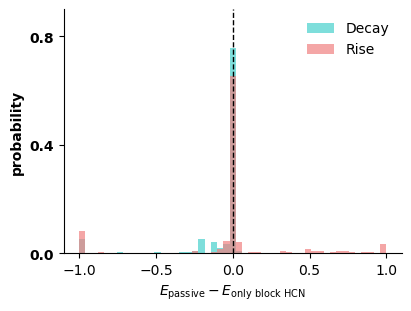

In [15]:
error_diff_rise_dend = var_dend_rise_passive-var_dend_rise_active_blockIh
error_diff_rise_apic = var_apic_rise_passive-var_apic_rise_active_blockIh
error_diff_decay_dend = var_dend_decay_passive-var_dend_decay_active_blockIh
error_diff_decay_apic = var_apic_decay_passive-var_apic_decay_active_blockIh
error_diff_rise = np.concatenate((error_diff_rise_dend, error_diff_rise_apic))
error_diff_decay = np.concatenate((error_diff_decay_dend, error_diff_decay_apic))


print(np.shape(error_diff_rise))
fontsize = 10
bins = np.linspace(-1,1,50)
fig, ax1 = plt.subplots(1,1,figsize=(4,3), constrained_layout=True)

# 定义误差和 bin 范围
min_bin = bins[0]  # bins的最小值
max_bin = bins[-1]  # bins的最大值

# 将 error 限制在 [min_bin, max_bin] 之间
clipped_error_rise = np.clip(error_diff_rise, min_bin, max_bin)
clipped_error_decay = np.clip(error_diff_decay, min_bin, max_bin)

nE_our,binsE_our = np.histogram(clipped_error_rise,bins=bins)
nE_trad,binsE_trad = np.histogram(clipped_error_decay,bins=bins)
widths = bins[2]-bins[1]
ax1.bar(bins[:-1], nE_trad/np.sum(nE_trad), zorder=1, align='edge', width=widths, 
        color='mediumturquoise',alpha=0.7, edgecolor = None,  linewidth=1,label='Decay')
ax1.bar(bins[:-1], nE_our/np.sum(nE_our), zorder=1, align='edge', width=widths,
        color='lightcoral',alpha=0.7, edgecolor = None,  linewidth=1,label='Rise')


ax1.set_xlabel(r'$E_{\text{passive}}-E_{\text{only block HCN}}$',fontsize=fontsize,weight='bold')
ax1.set_ylabel('probability',fontsize=fontsize,weight='bold')
# ax1.set_xticks(np.arange(0,1.1,0.5))
ax1.set_yticks(np.arange(0,1.0,0.4))
# ax1.set_xticklabels(np.arange(0,1.1,0.5),fontsize=fontsize,weight='bold')
ax1.set_yticklabels(np.arange(0,1.0,0.4),fontsize=fontsize,weight='bold')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylim([0,0.9])
# ax1.set_xlim([0,1])
ax1.legend(loc='best',fontsize=fontsize,edgecolor='white')
ax1.axvline(0, color='black', linestyle='--', linewidth=1)
# ax1.set_title('E',fontsize=fontsize,weight='bold')
plt.savefig('error_diff_passive_HCN.eps')

(193,)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


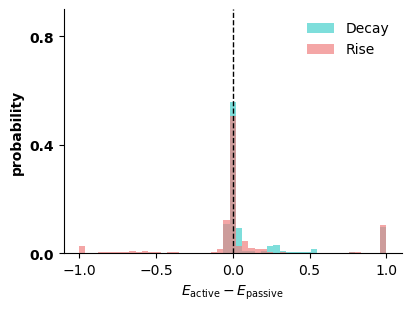

In [24]:
error_diff_rise_dend = var_dend_rise_active-var_dend_rise_passive
error_diff_rise_apic = var_apic_rise_active-var_apic_rise_passive
error_diff_decay_dend = var_dend_decay_active-var_dend_decay_passive
error_diff_decay_apic = var_apic_decay_active-var_apic_decay_passive
error_diff_rise = np.concatenate((error_diff_rise_dend, error_diff_rise_apic))
error_diff_decay = np.concatenate((error_diff_decay_dend, error_diff_decay_apic))


print(np.shape(error_diff_rise))
fontsize = 10
bins = np.linspace(-1,1,50)
fig, ax1 = plt.subplots(1,1,figsize=(4,3), constrained_layout=True)

# 定义误差和 bin 范围
min_bin = bins[0]  # bins的最小值
max_bin = bins[-1]  # bins的最大值

# 将 error 限制在 [min_bin, max_bin] 之间
clipped_error_rise = np.clip(error_diff_rise, min_bin, max_bin)
clipped_error_decay = np.clip(error_diff_decay, min_bin, max_bin)

nE_our,binsE_our = np.histogram(clipped_error_rise,bins=bins)
nE_trad,binsE_trad = np.histogram(clipped_error_decay,bins=bins)
widths = bins[2]-bins[1]
ax1.bar(bins[:-1], nE_trad/np.sum(nE_trad), zorder=1, align='edge', width=widths, 
        color='mediumturquoise',alpha=0.7, edgecolor = None,  linewidth=1,label='Decay')
ax1.bar(bins[:-1], nE_our/np.sum(nE_our), zorder=1, align='edge', width=widths,
        color='lightcoral',alpha=0.7, edgecolor = None,  linewidth=1,label='Rise')


ax1.set_xlabel(r'$E_{\text{active}}-E_{\text{passive}}$',fontsize=fontsize,weight='bold')
ax1.set_ylabel('probability',fontsize=fontsize,weight='bold')
# ax1.set_xticks(np.arange(0,1.1,0.5))
ax1.set_yticks(np.arange(0,1.0,0.4))
# ax1.set_xticklabels(np.arange(0,1.1,0.5),fontsize=fontsize,weight='bold')
ax1.set_yticklabels(np.arange(0,1.0,0.4),fontsize=fontsize,weight='bold')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylim([0,0.9])
# ax1.set_xlim([0,1])
ax1.legend(loc='best',fontsize=fontsize,edgecolor='white')
ax1.axvline(0, color='black', linestyle='--', linewidth=1)
# ax1.set_title('E',fontsize=fontsize,weight='bold')
plt.savefig('error_diff_active_passive.eps')